In [15]:
pip install anthropic pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.0 MB/s eta 0:00:00


#**IMPORT LIBRARY**

In [16]:
from google.colab import drive

# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, linregress, shapiro, f_oneway

# Repeated Measures ANOVA
import pingouin as pg

# Machine Learning Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import glob
import os
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set font untuk mendukung karakter Indonesia
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [17]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**LOAD DATASET**

##Dataset Kelulusan

In [18]:
# Load and concatenate df_kelulusan
kelulusan_folder_path = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/laporan-akhir-lokus-kka-ysic'

all_files = os.listdir(kelulusan_folder_path)
csv_files = [f for f in all_files if f.endswith('.csv')]

list_df = []

for csv_file in csv_files:
    file_path = os.path.join(kelulusan_folder_path, csv_file)
    df_temp = pd.read_csv(file_path)
    list_df.append(df_temp)

df_kelulusan = pd.concat(list_df, ignore_index=True)

print(f"✅ Dataset kelulusan berhasil dimuat: {df_kelulusan.shape}")
print(f"Total peserta: {len(df_kelulusan)}")
display(df_kelulusan.head())

✅ Dataset kelulusan berhasil dimuat: (619, 15)
Total peserta: 619


,User ID,Email,Nama,Program Local Name,Kelas Name,PP Score,Presensi Score,Canvas Score,Total Score,Predikat,Status Nilai,Nilai Prasyarat Sertifikat,Status Prasyarat Sertifikat,Flag Sertifikat,Status Kelulusan
0,V0Bj21oo0Z,aannuraeni12@guru.sd.belajar.id,AAN NURAENI,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,87.16,87.16,Baik,Lulus,0,NaN,True,Lulus
1,qo68WAmb0a,abdulrosid68@guru.sd.belajar.id,ABDUL ROSID,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,85.94,85.94,Baik,Lulus,0,NaN,True,Lulus
2,J61gO4KE97,adinur77@guru.sd.belajar.id,ADI MUHAROM NUR,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,86.05,86.06,Baik,Lulus,0,NaN,True,Lulus
3,OyDOd1Kw9X,aditardinda44@guru.sd.belajar.id,ADI TARDINDA,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,85.84,85.85,Baik,Lulus,0,NaN,True,Lulus
4,50ZOQBMN6m,agus988@guru.sd.belajar.id,AGUS JAJAT JATMIHA,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,[FASE C] KKA - LPD Yayasan Sakata Innovation C...,0,0,84.27,84.28,Baik,Lulus,0,NaN,True,Lulus


## Load Penilaian HR

In [19]:
# Load HR evaluation data
hr_file_path = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/Matriks Penilaian HR Real.xlsx'
df_hr = pd.read_excel(hr_file_path)

# Keep only necessary columns
df_hr = df_hr[[
    'Nama', 'ID', 'Kemampuan komunikasi',
    'Pengalaman Kerja', 'Keterampilan Teknis',
    'Penilaian Kinerja Kepegawaian'
]]

In [20]:
# Rename for consistency
df_hr.columns = ['Nama', 'ID', 'Kemampuan komunikasi',
                 'Pengalaman Kerja', 'Keterampilan Teknis',
                 'Penilaian Kinerja Kepegawaian']

# Add Platform column
df_hr['Platform'] = 'HR (Baseline)'

print(f"✅ Dataset HR berhasil dimuat: {df_hr.shape}")
print(f"\nStatistik Deskriptif HR:")
display(df_hr[['Kemampuan komunikasi', 'Pengalaman Kerja',
               'Keterampilan Teknis', 'Penilaian Kinerja Kepegawaian']].describe())

✅ Dataset HR berhasil dimuat: (32, 7)

Statistik Deskriptif HR:


,Kemampuan komunikasi,Pengalaman Kerja,Keterampilan Teknis,Penilaian Kinerja Kepegawaian
count,32.00,32.00,32.00,32.00
mean,88.06,87.81,88.38,89.44
std,2.17,2.33,2.46,1.98
min,85.00,85.00,85.00,86.00
25%,85.00,85.00,85.75,88.00
50%,88.00,88.00,88.00,90.00
75%,90.00,90.00,90.00,92.00
max,92.00,92.00,92.00,92.00


In [22]:
# Check missing values
print("\nMissing values dalam df_hr:")
print(df_hr.isnull().sum())

# Remove rows with missing values if any
df_hr = df_hr.dropna()
print(f"\n✅ Shape setelah membersihkan missing values: {df_hr.shape}")


Missing values dalam df_hr:
Nama                             0
ID                               0
Kemampuan komunikasi             0
Pengalaman Kerja                 0
Keterampilan Teknis              0
Penilaian Kinerja Kepegawaian    0
Platform                         0
dtype: int64

✅ Shape setelah membersihkan missing values: (32, 7)


## **Load Penilaian AI**

In [23]:
# Define folder containing AI evaluation files
ai_folder_path = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kenerja tim proyek/Dataset/Penilaian AI Anova'

# Get all Excel files
ai_files = glob.glob(os.path.join(ai_folder_path, '*.xlsx'))

print(f"Ditemukan {len(ai_files)} file AI:")
for file in ai_files:
    print(f"  - {os.path.basename(file)}")

Ditemukan 5 file AI:
  - Deep Seek V3.2.xlsx
  - GLM 4.7.xlsx
  - ChatGPT.5.2.xlsx
  - Gemini 3 Pro.xlsx
  - Claude Sonnet 4.5.xlsx


In [24]:
# Load AI dataframes
ai_dataframes = {}

for file_path in ai_files:
    file_name = os.path.basename(file_path)
    platform_name = file_name.replace('.xlsx', '').replace('_', ' ')

    df_temp = pd.read_excel(file_path)

    # Rename columns if needed
    if 'AI Tools' in df_temp.columns:
        df_temp['Platform'] = df_temp['AI Tools']
    else:
        df_temp['Platform'] = platform_name

    ai_dataframes[platform_name] = df_temp
    print(f"✅ {platform_name}: {df_temp.shape}")

✅ Deep Seek V3.2: (32, 13)
✅ GLM 4.7: (32, 13)
✅ ChatGPT.5.2: (32, 13)
✅ Gemini 3 Pro: (32, 13)
✅ Claude Sonnet 4.5: (32, 13)


In [25]:
# Keep only necessary columns from AI dataframes
columns_to_keep = [
    'Platform', 'ID', 'Nama', 'Kemampuan komunikasi',
    'Pengalaman Kerja', 'Keterampilan Teknis',
    'Penilaian Kinerja Kepegawaian'
]

# Alternative column names
alt_columns = {
    'Kemampuan Komunikasi': 'Kemampuan komunikasi',
}

processed_ai_dfs = []

for platform_name, df in ai_dataframes.items():
    # Rename alternative columns
    df = df.rename(columns=alt_columns)

    # Select only needed columns
    available_cols = [col for col in columns_to_keep if col in df.columns]
    df_clean = df[available_cols].copy()

    # Ensure Platform column
    if 'Platform' not in df_clean.columns:
        df_clean['Platform'] = platform_name

    processed_ai_dfs.append(df_clean)

# Concatenate all AI dataframes
df_ai_all = pd.concat(processed_ai_dfs, ignore_index=True)

print(f"\n✅ Dataset AI gabungan berhasil dibuat: {df_ai_all.shape}")
print(f"\nPlatform AI yang tersedia:")
print(df_ai_all['Platform'].value_counts())

display(df_ai_all.head(10))


✅ Dataset AI gabungan berhasil dibuat: (160, 7)

Platform AI yang tersedia:
Platform
Deep Seek V3.2       32
GLM 4.7              32
Chat GPT 5.2         32
Gemini 3 Pro         32
Claude Sonnet 4.5    32
Name: count, dtype: int64


,Platform,ID,Nama,Kemampuan komunikasi,Pengalaman Kerja,Keterampilan Teknis,Penilaian Kinerja Kepegawaian
0,Deep Seek V3.2,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",92,94,93,92
1,Deep Seek V3.2,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",90,91,92,90
2,Deep Seek V3.2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",90,90,91,91
3,Deep Seek V3.2,FKKA-04,"Agus Supriatman, S.T., M.Kom.",91,89,90,93
4,Deep Seek V3.2,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",90,90,90,92
5,Deep Seek V3.2,FKKA-06,"Evi Dewi Sri Mulyani, M.Kom",90,91,91,93
6,Deep Seek V3.2,FKKA-07,"Ratna Rustina, M.Pd",89,89,87,91
7,Deep Seek V3.2,FKKA-08,"Neng Ika Kurniati, S.Si., M.Cs.",90,90,92,91
8,Deep Seek V3.2,FKKA-09,"Shinta Siti Sundari, M.Kom",88,89,89,91
9,Deep Seek V3.2,FKKA-10,"Robby Maududy, S.Pd., M.Kom",89,90,91,91


In [ ]:
print(f"\n{'='*60}")
print(f"Total AI evaluations: {len(df_ai_all)} rows")
print(f"\nSample of combined data:")
display(df_ai_all.head(10))

# Persiapan Data Repeated Measure ANOVA

In [26]:
# Combine HR and AI data
df_combined = pd.concat([df_hr, df_ai_all], ignore_index=True)

print(f"✅ Dataset gabungan (HR + AI): {df_combined.shape}")
print(f"\nDistribusi per Platform:")
print(df_combined['Platform'].value_counts())

# Check for missing values
print(f"\nMissing values:")
print(df_combined.isnull().sum())

# Remove any remaining missing values
df_combined = df_combined.dropna(subset=['ID', 'Kemampuan komunikasi',
                                          'Pengalaman Kerja', 'Keterampilan Teknis'])

print(f"\n✅ Shape setelah cleaning: {df_combined.shape}")

✅ Dataset gabungan (HR + AI): (192, 7)

Distribusi per Platform:
Platform
HR (Baseline)        32
Deep Seek V3.2       32
GLM 4.7              32
Chat GPT 5.2         32
Gemini 3 Pro         32
Claude Sonnet 4.5    32
Name: count, dtype: int64

Missing values:
Nama                             0
ID                               0
Kemampuan komunikasi             0
Pengalaman Kerja                 0
Keterampilan Teknis              0
Penilaian Kinerja Kepegawaian    0
Platform                         0
dtype: int64

✅ Shape setelah cleaning: (192, 7)


In [27]:
# Verifikasi bahwa setiap ID memiliki data dari semua platform
platform_count_per_id = df_combined.groupby('ID')['Platform'].nunique()
expected_platforms = df_combined['Platform'].nunique()

print(f"Jumlah platform yang diharapkan per ID: {expected_platforms}")
print(f"\nDistribusi jumlah platform per ID:")
print(platform_count_per_id.value_counts().sort_index())

# Filter hanya ID yang memiliki data lengkap dari semua platform
complete_ids = platform_count_per_id[platform_count_per_id == expected_platforms].index
df_complete = df_combined[df_combined['ID'].isin(complete_ids)].copy()

print(f"\n✅ Jumlah anggota tim dengan data lengkap: {len(complete_ids)}")
print(f"✅ Shape dataset final: {df_complete.shape}")

# Sort by ID and Platform for easier viewing
df_complete = df_complete.sort_values(['ID', 'Platform']).reset_index(drop=True)

print(f"\nSample data (ID pertama dengan semua platform):")
display(df_complete[df_complete['ID'] == df_complete['ID'].iloc[0]])

Jumlah platform yang diharapkan per ID: 6

Distribusi jumlah platform per ID:
Platform
6    32
Name: count, dtype: int64

✅ Jumlah anggota tim dengan data lengkap: 32
✅ Shape dataset final: (192, 7)

Sample data (ID pertama dengan semua platform):


,Nama,ID,Kemampuan komunikasi,Pengalaman Kerja,Keterampilan Teknis,Penilaian Kinerja Kepegawaian,Platform
0,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",FKKA-01,95,95,94,95,Chat GPT 5.2
1,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",FKKA-01,92,94,93,93,Claude Sonnet 4.5
2,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",FKKA-01,92,94,93,92,Deep Seek V3.2
3,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",FKKA-01,94,95,93,93,GLM 4.7
4,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",FKKA-01,94,95,92,93,Gemini 3 Pro
5,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",FKKA-01,90,90,88,90,HR (Baseline)


# Analisis Deskriptive Platform

In [28]:
# Descriptive statistics per platform
variables = ['Kemampuan komunikasi', 'Pengalaman Kerja', 'Keterampilan Teknis']

print("="*100)
print("STATISTIK DESKRIPTIF PER PLATFORM")
print("="*100)

for var in variables:
    print(f"\n{'='*100}")
    print(f"Variabel: {var}")
    print("="*100)

    desc_stats = df_complete.groupby('Platform')[var].agg([
        ('N', 'count'),
        ('Mean', 'mean'),
        ('SD', 'std'),
        ('Min', 'min'),
        ('Q1', lambda x: x.quantile(0.25)),
        ('Median', 'median'),
        ('Q3', lambda x: x.quantile(0.75)),
        ('Max', 'max')
    ]).round(2)

    display(desc_stats)

STATISTIK DESKRIPTIF PER PLATFORM

Variabel: Kemampuan komunikasi


,N,Mean,SD,Min,Q1,Median,Q3,Max
Platform,,,,,,,,
Chat GPT 5.2,32,91.03,1.45,89,90.00,91.00,92.00,95
Claude Sonnet 4.5,32,90.69,1.15,88,90.00,91.00,91.00,93
Deep Seek V3.2,32,89.94,1.27,87,89.00,90.00,91.00,92
GLM 4.7,32,91.53,1.32,88,91.00,92.00,92.00,94
Gemini 3 Pro,32,92.22,1.01,90,92.00,92.00,93.00,94
HR (Baseline),32,88.06,2.17,85,85.00,88.00,90.00,92



Variabel: Pengalaman Kerja


,N,Mean,SD,Min,Q1,Median,Q3,Max
Platform,,,,,,,,
Chat GPT 5.2,32,90.03,2.68,85,88.00,90.00,92.00,95
Claude Sonnet 4.5,32,89.47,2.85,85,87.00,89.00,92.00,94
Deep Seek V3.2,32,88.56,2.41,85,86.75,88.00,90.00,94
GLM 4.7,32,90.84,3.08,86,88.00,91.00,94.00,95
Gemini 3 Pro,32,90.97,2.90,87,88.00,91.00,94.00,95
HR (Baseline),32,87.81,2.33,85,85.00,88.00,90.00,92



Variabel: Keterampilan Teknis


,N,Mean,SD,Min,Q1,Median,Q3,Max
Platform,,,,,,,,
Chat GPT 5.2,32,91.31,2.55,86,90.00,91.50,94.00,95
Claude Sonnet 4.5,32,90.44,2.79,86,87.75,91.00,93.00,95
Deep Seek V3.2,32,89.03,2.65,85,86.75,89.50,91.00,94
GLM 4.7,32,91.94,2.72,87,90.00,92.50,95.00,95
Gemini 3 Pro,32,91.69,1.99,88,90.00,92.00,93.00,95
HR (Baseline),32,88.38,2.46,85,85.75,88.00,90.00,92


# Data Visualisasi

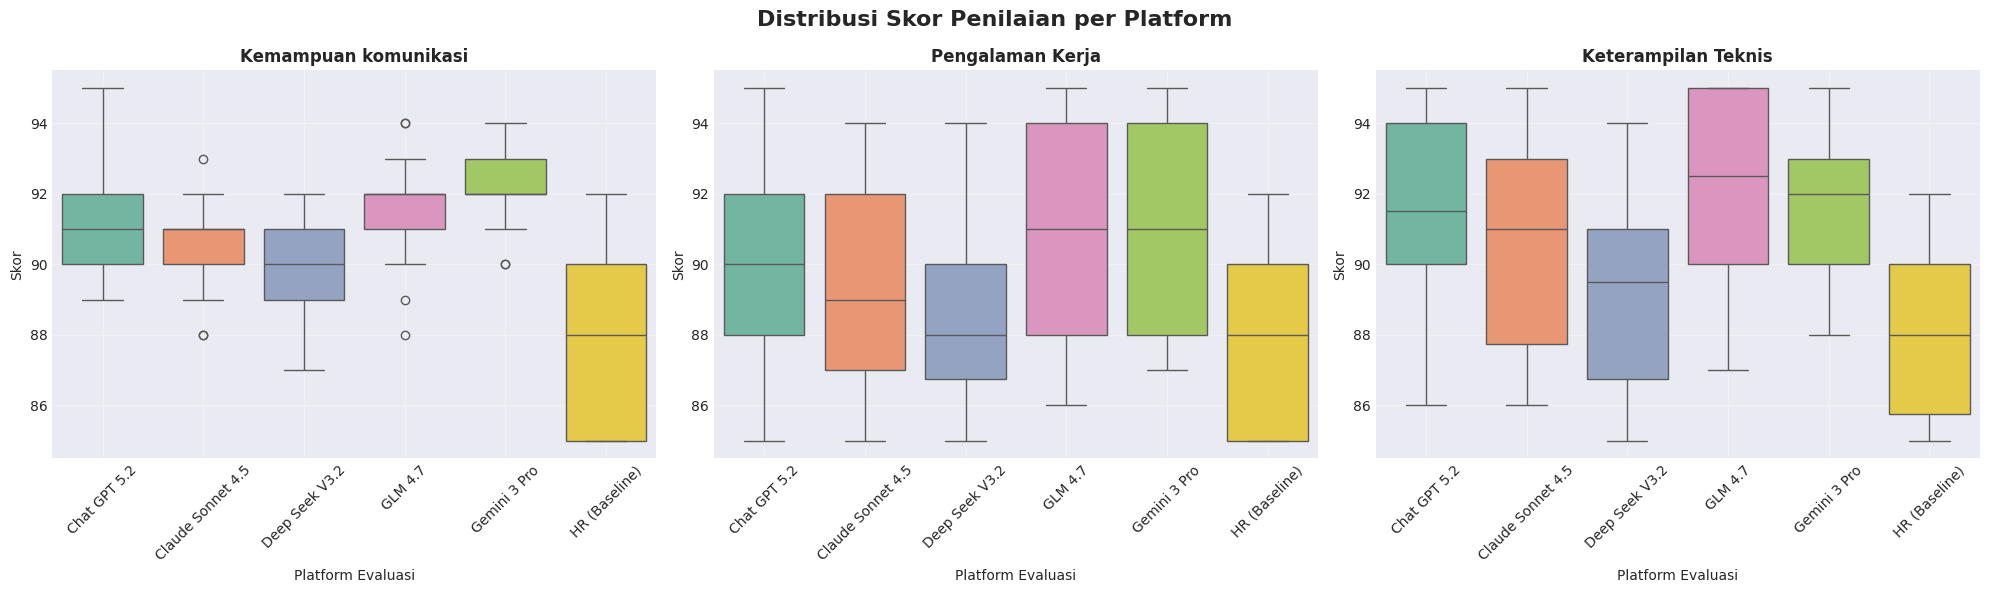

In [29]:
# Boxplot untuk setiap variabel
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribusi Skor Penilaian per Platform', fontsize=16, fontweight='bold')

for idx, var in enumerate(variables):
    ax = axes[idx]
    sns.boxplot(data=df_complete, x='Platform', y=var, ax=ax, palette='Set2')
    ax.set_title(f'{var}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Platform Evaluasi', fontsize=10)
    ax.set_ylabel('Skor', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

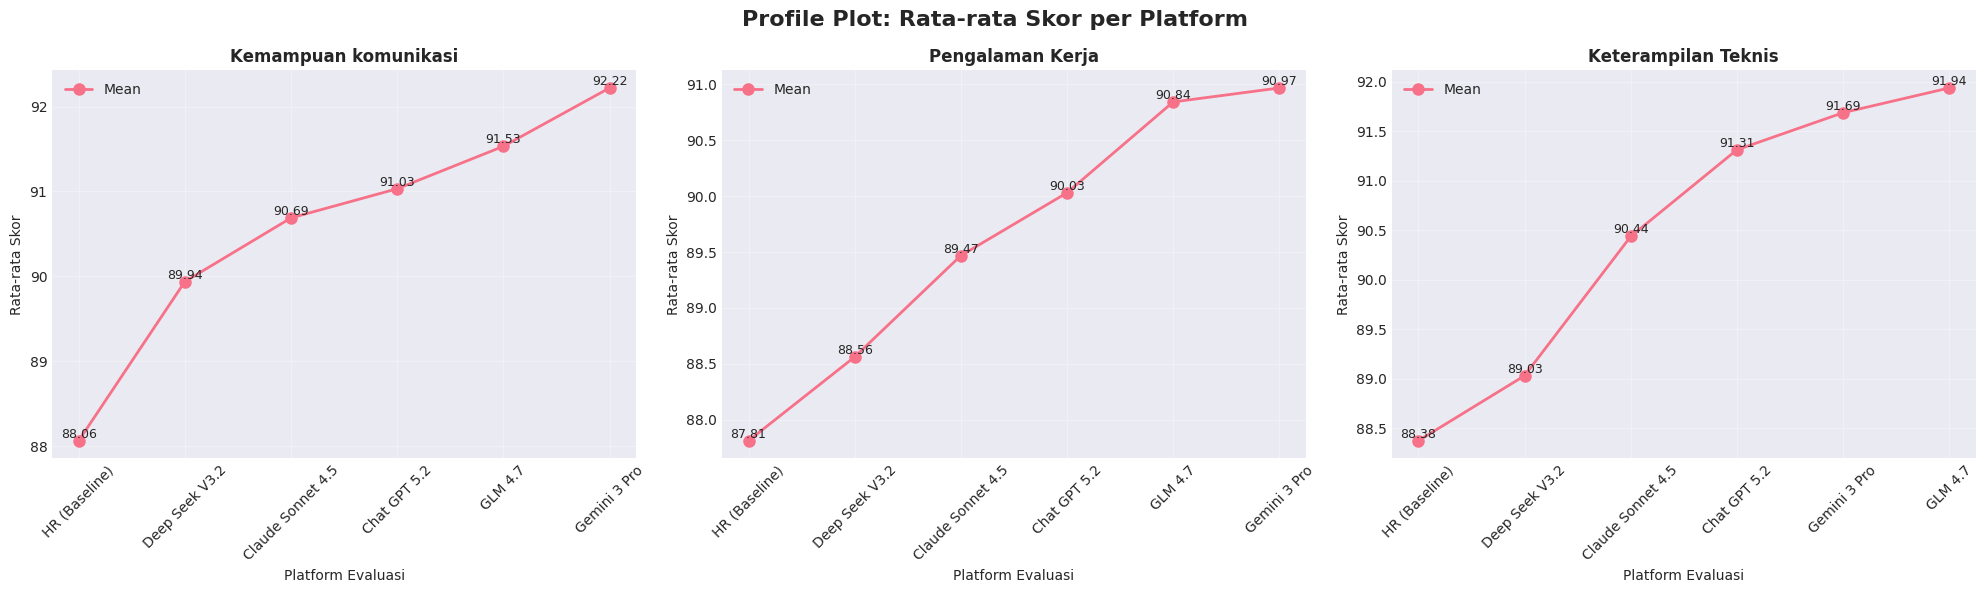

In [30]:
# Profile plot (line plot) untuk melihat pola
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Profile Plot: Rata-rata Skor per Platform', fontsize=16, fontweight='bold')

for idx, var in enumerate(variables):
    ax = axes[idx]
    mean_data = df_complete.groupby('Platform')[var].mean().reset_index()
    mean_data = mean_data.sort_values(var)

    ax.plot(mean_data['Platform'], mean_data[var], marker='o',
            linewidth=2, markersize=8, label='Mean')
    ax.set_title(f'{var}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Platform Evaluasi', fontsize=10)
    ax.set_ylabel('Rata-rata Skor', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Add value labels
    for x, y in zip(mean_data['Platform'], mean_data[var]):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Uji Asumsi untuk Repeated Measures ANOVA

## Uji Normalitas (Shapiro-Wilk Test)

In [31]:
print("="*100)
print("UJI NORMALITAS (SHAPIRO-WILK TEST)")
print("="*100)
print("H0: Data berdistribusi normal")
print("H1: Data tidak berdistribusi normal")
print("Alpha: 0.05")
print("="*100)

normality_results = []

for var in variables:
    print(f"\n{'='*100}")
    print(f"Variabel: {var}")
    print("="*100)

    for platform in df_complete['Platform'].unique():
        data = df_complete[df_complete['Platform'] == platform][var].dropna()

        if len(data) >= 3:  # Shapiro-Wilk requires at least 3 samples
            stat, p_value = shapiro(data)
            is_normal = "Normal" if p_value > 0.05 else "Tidak Normal"

            normality_results.append({
                'Variabel': var,
                'Platform': platform,
                'Statistic': stat,
                'P-value': p_value,
                'Kesimpulan': is_normal
            })

            print(f"{platform:25} | Statistic: {stat:.4f} | P-value: {p_value:.4f} | {is_normal}")

df_normality = pd.DataFrame(normality_results)

print(f"\n{'='*100}")
print("RINGKASAN UJI NORMALITAS")
print("="*100)
display(df_normality)

# Count normal vs non-normal
normality_summary = df_normality['Kesimpulan'].value_counts()
print(f"\nTotal pengujian: {len(df_normality)}")
print(normality_summary)

UJI NORMALITAS (SHAPIRO-WILK TEST)
H0: Data berdistribusi normal
H1: Data tidak berdistribusi normal
Alpha: 0.05

Variabel: Kemampuan komunikasi
Chat GPT 5.2              | Statistic: 0.9281 | P-value: 0.0347 | Tidak Normal
Claude Sonnet 4.5         | Statistic: 0.9107 | P-value: 0.0117 | Tidak Normal
Deep Seek V3.2            | Statistic: 0.9368 | P-value: 0.0607 | Normal
GLM 4.7                   | Statistic: 0.9340 | P-value: 0.0506 | Normal
Gemini 3 Pro              | Statistic: 0.8968 | P-value: 0.0051 | Tidak Normal
HR (Baseline)             | Statistic: 0.8260 | P-value: 0.0001 | Tidak Normal

Variabel: Pengalaman Kerja
Chat GPT 5.2              | Statistic: 0.9560 | P-value: 0.2125 | Normal
Claude Sonnet 4.5         | Statistic: 0.9325 | P-value: 0.0459 | Tidak Normal
Deep Seek V3.2            | Statistic: 0.9475 | P-value: 0.1220 | Normal
GLM 4.7                   | Statistic: 0.9016 | P-value: 0.0068 | Tidak Normal
Gemini 3 Pro              | Statistic: 0.8723 | P-value: 0.00

,Variabel,Platform,Statistic,P-value,Kesimpulan
0,Kemampuan komunikasi,Chat GPT 5.2,0.93,0.03,Tidak Normal
1,Kemampuan komunikasi,Claude Sonnet 4.5,0.91,0.01,Tidak Normal
2,Kemampuan komunikasi,Deep Seek V3.2,0.94,0.06,Normal
3,Kemampuan komunikasi,GLM 4.7,0.93,0.05,Normal
4,Kemampuan komunikasi,Gemini 3 Pro,0.90,0.01,Tidak Normal
5,Kemampuan komunikasi,HR (Baseline),0.83,0.00,Tidak Normal
6,Pengalaman Kerja,Chat GPT 5.2,0.96,0.21,Normal
7,Pengalaman Kerja,Claude Sonnet 4.5,0.93,0.05,Tidak Normal
8,Pengalaman Kerja,Deep Seek V3.2,0.95,0.12,Normal
9,Pengalaman Kerja,GLM 4.7,0.90,0.01,Tidak Normal



Total pengujian: 18
Kesimpulan
Tidak Normal    12
Normal           6
Name: count, dtype: int64


## Visualisasi Normalitas (Q-Q Plot)

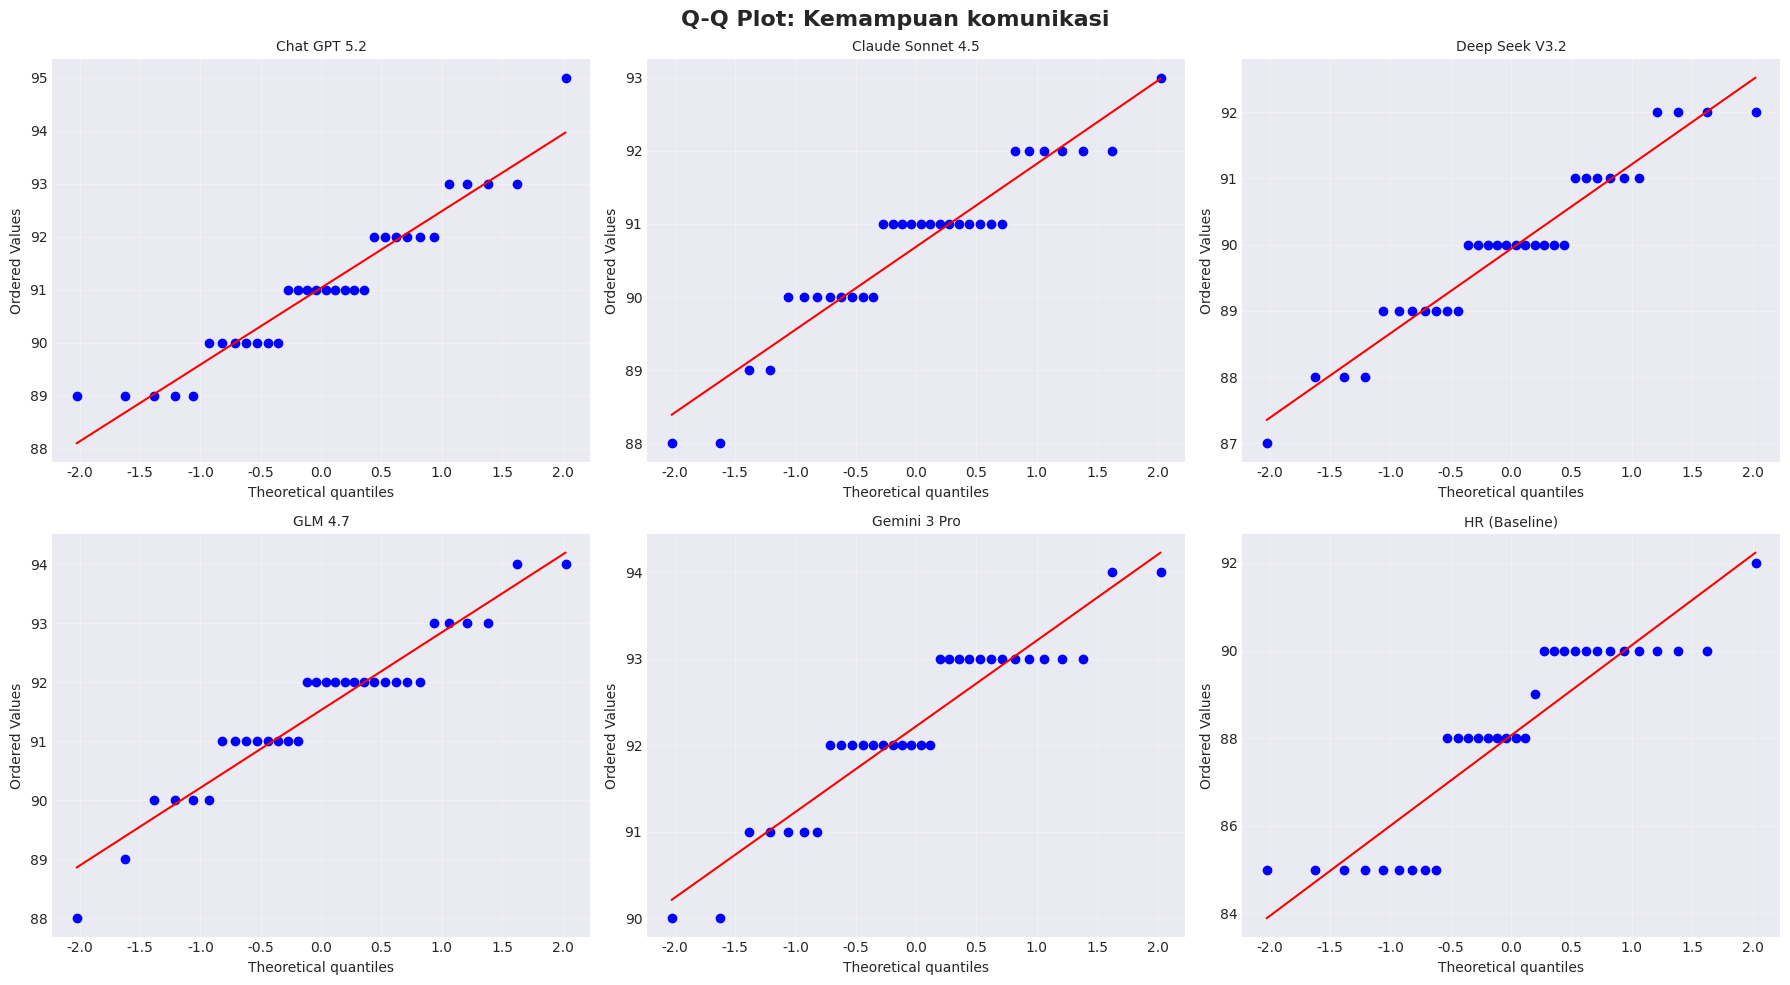

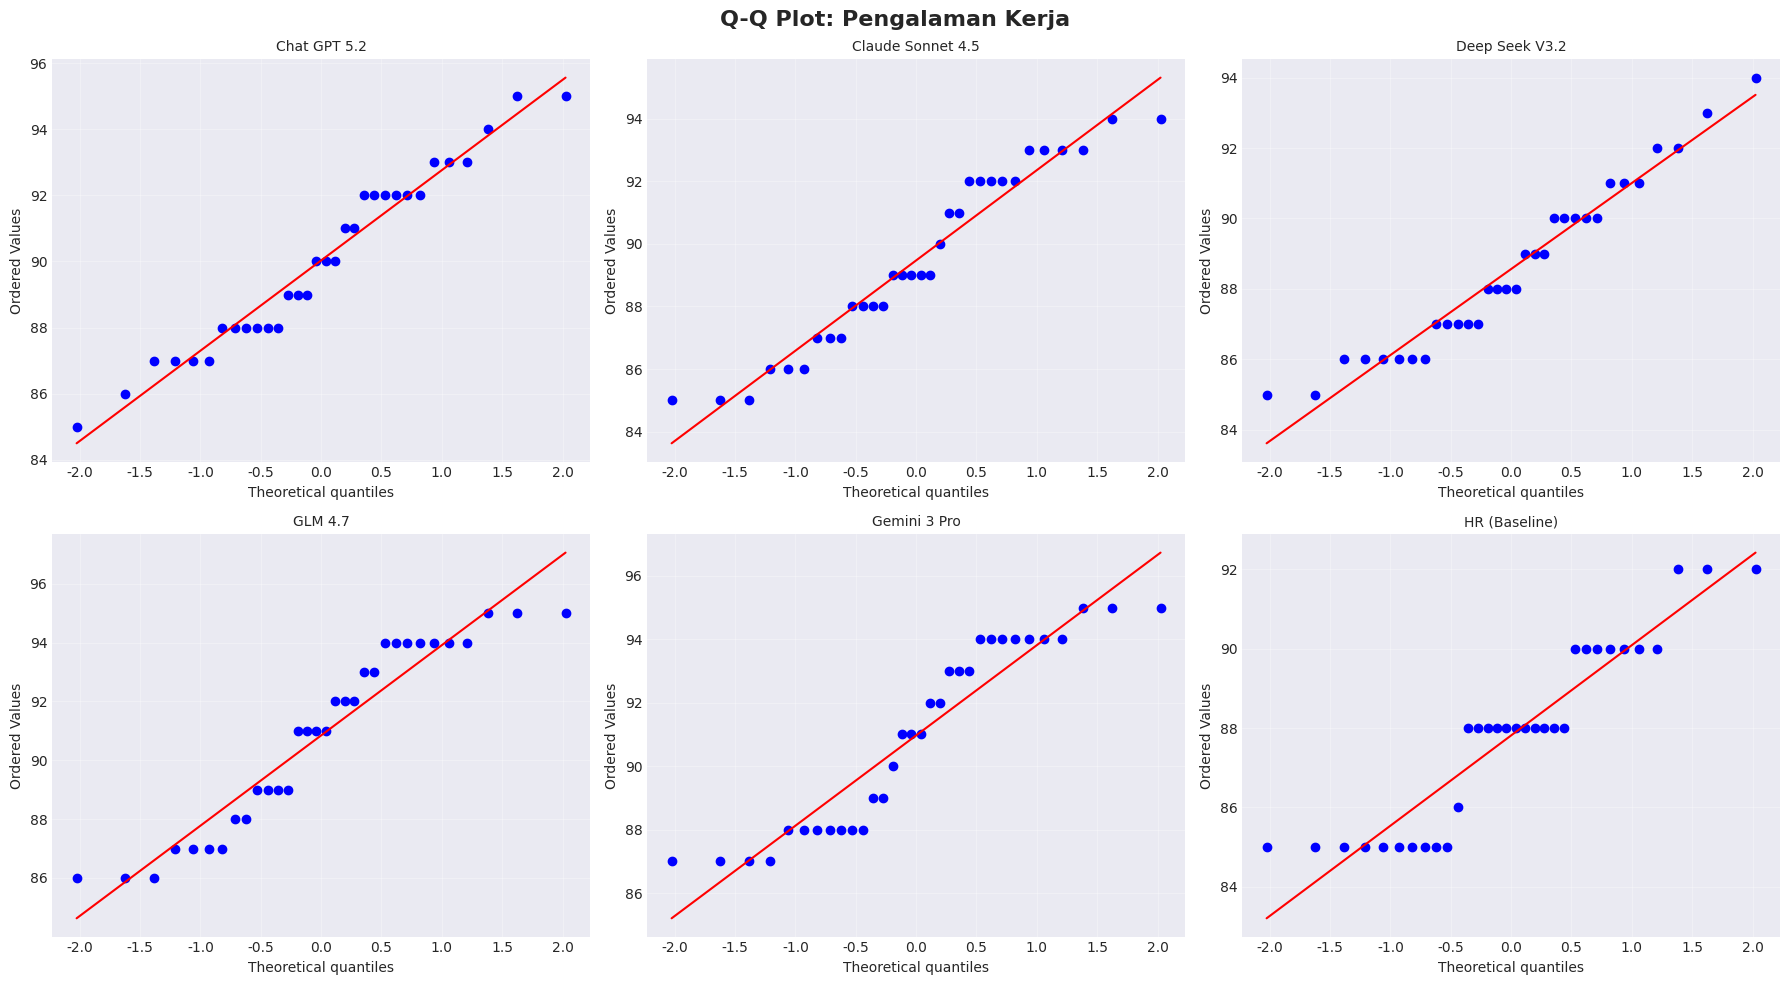

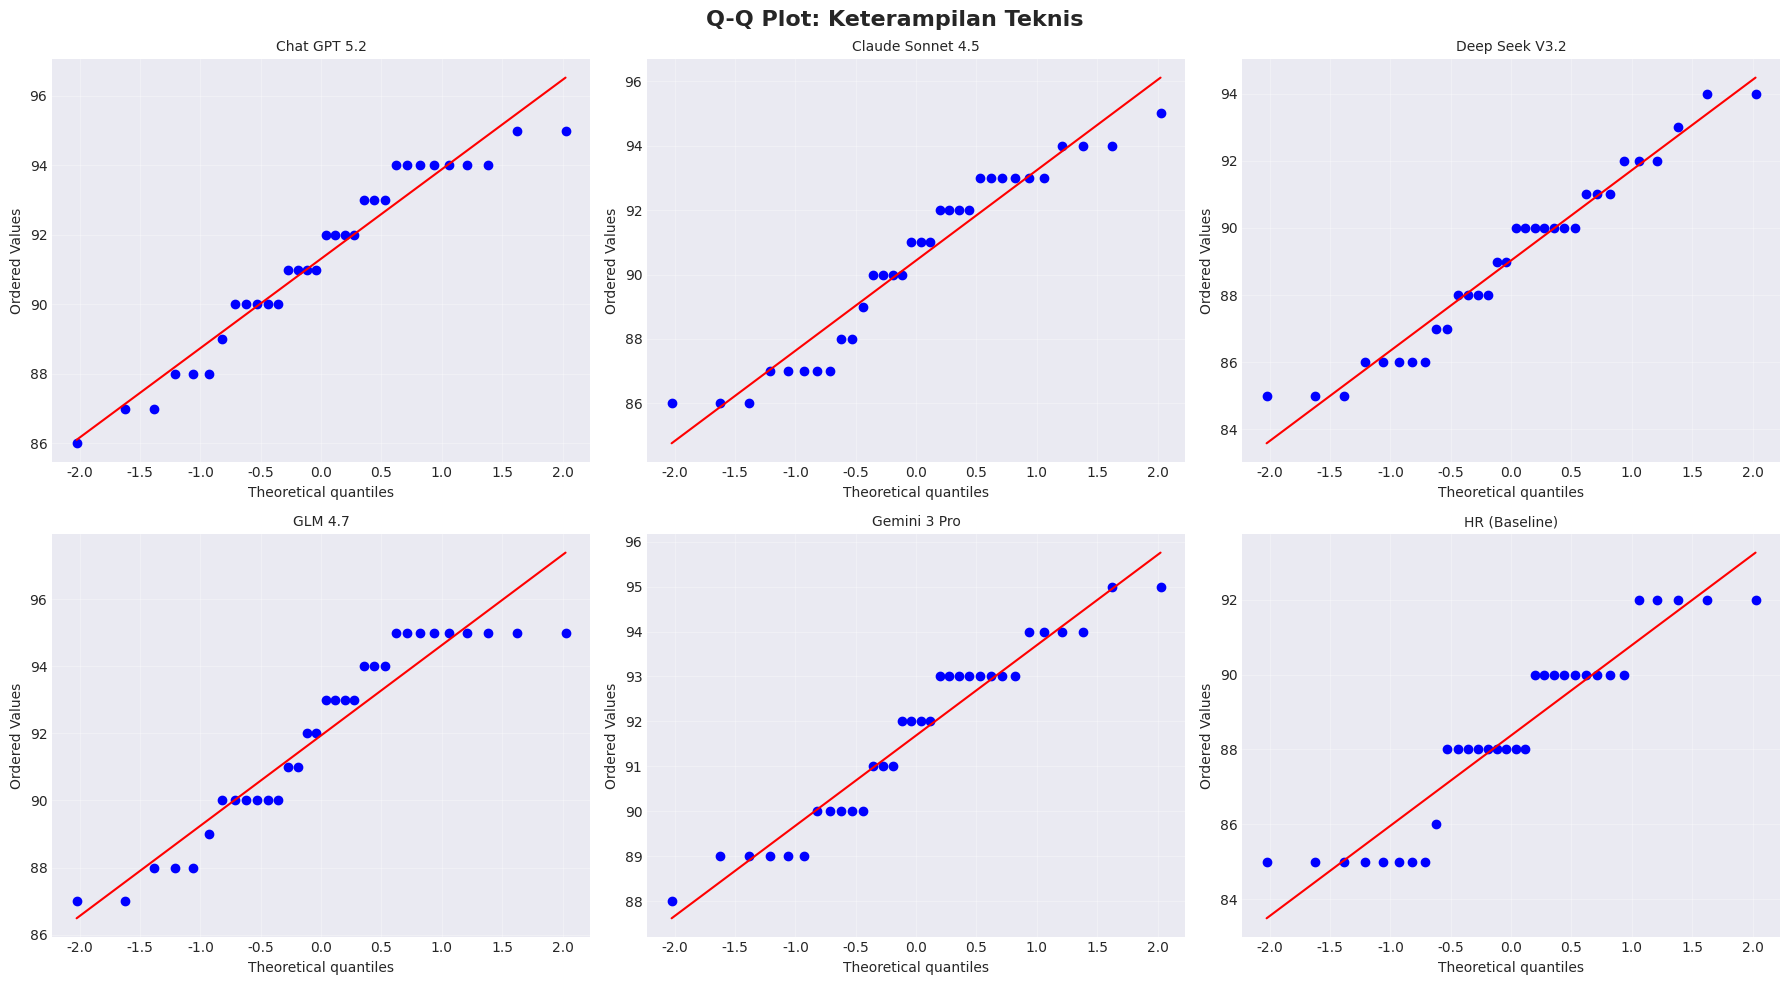

In [32]:
# Q-Q Plot untuk setiap variabel dan platform
platforms = df_complete['Platform'].unique()
n_platforms = len(platforms)

for var in variables:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Q-Q Plot: {var}', fontsize=16, fontweight='bold')
    axes = axes.flatten()

    for idx, platform in enumerate(platforms):
        if idx < len(axes):
            ax = axes[idx]
            data = df_complete[df_complete['Platform'] == platform][var].dropna()

            stats.probplot(data, dist="norm", plot=ax)
            ax.set_title(f'{platform}', fontsize=10)
            ax.grid(True, alpha=0.3)

    # Hide unused subplots
    for idx in range(n_platforms, len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Repeated Measures ANOVA

In [33]:
# Reshape data to wide format for RM-ANOVA
# We need: Subject (ID), Within-factor (Platform), DV (each variable)

print("="*100)
print("REPEATED MEASURES ANOVA")
print("="*100)
print("Design: Within-Subjects")
print("Independent Variable: Platform Evaluasi (6 levels)")
print("Dependent Variables: Kemampuan komunikasi, Pengalaman Kerja, Keterampilan Teknis")
print("Subject: ID Anggota Tim (n=32)")
print("="*100)

rm_anova_results = {}

for var in variables:
    print(f"\n{'='*100}")
    print(f"VARIABEL: {var}")
    print("="*100)

    # Perform RM-ANOVA using pingouin
    rm_result = pg.rm_anova(
        data=df_complete,
        dv=var,
        within='Platform',
        subject='ID',
        detailed=True
    )

    rm_anova_results[var] = rm_result

    print("\nHasil RM-ANOVA:")
    display(rm_result)

    # Sphericity test (Mauchly's Test)
    print("\nUji Sphericity (Mauchly's Test):")
    sphericity = pg.sphericity(
        data=df_complete,
        dv=var,
        within='Platform',
        subject='ID'
    )
    display(sphericity)

    # Interpretasi
    f_val = rm_result['F'].values[0]
    p_val = rm_result['p-unc'].values[0]
    eta_sq = rm_result['np2'].values[0] if 'np2' in rm_result.columns else None

    print(f"\n{'='*80}")
    print("INTERPRETASI:")
    print(f"F-statistic: {f_val:.4f}")
    print(f"P-value: {p_val:.4f}")
    if eta_sq:
        print(f"Partial Eta Squared (η²p): {eta_sq:.4f}")

    if p_val < 0.05:
        print(f"\n✅ SIGNIFIKAN: Terdapat perbedaan signifikan dalam {var} antar platform (p < 0.05)")
        print("   Diperlukan Post-Hoc Test untuk menentukan platform mana yang berbeda.")
    else:
        print(f"\n❌ TIDAK SIGNIFIKAN: Tidak terdapat perbedaan signifikan dalam {var} antar platform (p ≥ 0.05)")

    # Effect size interpretation
    if eta_sq:
        if eta_sq < 0.01:
            effect = "sangat kecil"
        elif eta_sq < 0.06:
            effect = "kecil"
        elif eta_sq < 0.14:
            effect = "sedang"
        else:
            effect = "besar"
        print(f"   Effect size: {effect}")

REPEATED MEASURES ANOVA
Design: Within-Subjects
Independent Variable: Platform Evaluasi (6 levels)
Dependent Variables: Kemampuan komunikasi, Pengalaman Kerja, Keterampilan Teknis
Subject: ID Anggota Tim (n=32)

VARIABEL: Kemampuan komunikasi

Hasil RM-ANOVA:


,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Platform,337.80,5,67.56,45.85,0.00,0.00,0.47,0.53,False,0.11,0.00
1,Error,228.37,155,1.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Uji Sphericity (Mauchly's Test):


SpherResults(spher=False, W=np.float64(0.10881561146618401), chi2=np.float64(64.54672359298871), dof=14, pval=np.float64(2.0458242000843726e-08))


INTERPRETASI:
F-statistic: 45.8542
P-value: 0.0000

✅ SIGNIFIKAN: Terdapat perbedaan signifikan dalam Kemampuan komunikasi antar platform (p < 0.05)
   Diperlukan Post-Hoc Test untuk menentukan platform mana yang berbeda.

VARIABEL: Pengalaman Kerja

Hasil RM-ANOVA:


,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Platform,252.60,5,50.52,36.70,0.00,0.00,0.15,0.71,False,0.30,0.00
1,Error,213.40,155,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Uji Sphericity (Mauchly's Test):


SpherResults(spher=False, W=np.float64(0.2979862735870282), chi2=np.float64(35.231598589989666), dof=14, pval=np.float64(0.0014016090406821435))


INTERPRETASI:
F-statistic: 36.6958
P-value: 0.0000

✅ SIGNIFIKAN: Terdapat perbedaan signifikan dalam Pengalaman Kerja antar platform (p < 0.05)
   Diperlukan Post-Hoc Test untuk menentukan platform mana yang berbeda.

VARIABEL: Keterampilan Teknis

Hasil RM-ANOVA:


,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Platform,345.78,5,69.16,53.85,0.00,0.00,0.22,0.67,False,0.34,0.00
1,Error,199.06,155,1.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Uji Sphericity (Mauchly's Test):


SpherResults(spher=False, W=np.float64(0.3365216116933963), chi2=np.float64(31.692603594178976), dof=14, pval=np.float64(0.0045417136695619))


INTERPRETASI:
F-statistic: 53.8491
P-value: 0.0000

✅ SIGNIFIKAN: Terdapat perbedaan signifikan dalam Keterampilan Teknis antar platform (p < 0.05)
   Diperlukan Post-Hoc Test untuk menentukan platform mana yang berbeda.


# Post-Hoc Tests (Pairwise Comparisons)

In [35]:
print("="*100)
print("POST-HOC TESTS: PAIRWISE COMPARISONS (BONFERRONI CORRECTION)")
print("="*100)

posthoc_results = {}

for var in variables:
    print(f"\n{'='*100}")
    print(f"VARIABEL: {var}")
    print("="*100)

    # Perform pairwise comparisons
    posthoc = pg.pairwise_tests(
        data=df_complete,
        dv=var,
        within='Platform',
        subject='ID',
        padjust='bonf',  # Bonferroni correction
        effsize='hedges'  # Effect size
    )

    posthoc_results[var] = posthoc

    print("\nHasil Pairwise Comparisons:")
    display(posthoc)

    # Filter significant comparisons
    significant = posthoc[posthoc['p-corr'] < 0.05]

    if len(significant) > 0:
        print(f"\n✅ Pasangan platform dengan perbedaan SIGNIFIKAN (p < 0.05):")
        for idx, row in significant.iterrows():
            print(f"   {row['A']} vs {row['B']}: p = {row['p-corr']:.4f}, Effect size = {row['hedges']:.4f}")
    else:
        print(f"\n❌ Tidak ada pasangan platform dengan perbedaan signifikan.")

POST-HOC TESTS: PAIRWISE COMPARISONS (BONFERRONI CORRECTION)

VARIABEL: Kemampuan komunikasi

Hasil Pairwise Comparisons:


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Platform,Chat GPT 5.2,Claude Sonnet 4.5,True,True,1.34,31.00,two-sided,0.19,1.00,bonf,0.426,0.26
1,Platform,Chat GPT 5.2,Deep Seek V3.2,True,True,4.16,31.00,two-sided,0.00,0.00,bonf,117.763,0.79
2,Platform,Chat GPT 5.2,GLM 4.7,True,True,-1.64,31.00,two-sided,0.11,1.00,bonf,0.63,-0.36
3,Platform,Chat GPT 5.2,Gemini 3 Pro,True,True,-5.46,31.00,two-sided,0.00,0.00,bonf,3508.874,-0.94
4,Platform,Chat GPT 5.2,HR (Baseline),True,True,6.63,31.00,two-sided,0.00,0.00,bonf,7.559e+04,1.59
5,Platform,Claude Sonnet 4.5,Deep Seek V3.2,True,True,5.28,31.00,two-sided,0.00,0.00,bonf,2178.035,0.61
6,Platform,Claude Sonnet 4.5,GLM 4.7,True,True,-3.83,31.00,two-sided,0.00,0.01,bonf,52.051,-0.67
7,Platform,Claude Sonnet 4.5,Gemini 3 Pro,True,True,-8.04,31.00,two-sided,0.00,0.00,bonf,2.795e+06,-1.40
8,Platform,Claude Sonnet 4.5,HR (Baseline),True,True,6.24,31.00,two-sided,0.00,0.00,bonf,2.734e+04,1.49
9,Platform,Deep Seek V3.2,GLM 4.7,True,True,-6.10,31.00,two-sided,0.00,0.00,bonf,1.886e+04,-1.22



✅ Pasangan platform dengan perbedaan SIGNIFIKAN (p < 0.05):
   Chat GPT 5.2 vs Deep Seek V3.2: p = 0.0035, Effect size = 0.7939
   Chat GPT 5.2 vs Gemini 3 Pro: p = 0.0001, Effect size = -0.9406
   Chat GPT 5.2 vs HR (Baseline): p = 0.0000, Effect size = 1.5903
   Claude Sonnet 4.5 vs Deep Seek V3.2: p = 0.0001, Effect size = 0.6124
   Claude Sonnet 4.5 vs GLM 4.7: p = 0.0088, Effect size = -0.6739
   Claude Sonnet 4.5 vs Gemini 3 Pro: p = 0.0000, Effect size = -1.4003
   Claude Sonnet 4.5 vs HR (Baseline): p = 0.0000, Effect size = 1.4941
   Deep Seek V3.2 vs GLM 4.7: p = 0.0000, Effect size = -1.2165
   Deep Seek V3.2 vs Gemini 3 Pro: p = 0.0000, Effect size = -1.9674
   Deep Seek V3.2 vs HR (Baseline): p = 0.0019, Effect size = 1.0424
   GLM 4.7 vs Gemini 3 Pro: p = 0.0436, Effect size = -0.5785
   GLM 4.7 vs HR (Baseline): p = 0.0000, Effect size = 1.9086
   Gemini 3 Pro vs HR (Baseline): p = 0.0000, Effect size = 2.4276

VARIABEL: Pengalaman Kerja

Hasil Pairwise Comparisons:


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Platform,Chat GPT 5.2,Claude Sonnet 4.5,True,True,2.62,31.00,two-sided,0.01,0.20,bonf,3.392,0.20
1,Platform,Chat GPT 5.2,Deep Seek V3.2,True,True,5.45,31.00,two-sided,0.00,0.00,bonf,3418.441,0.57
2,Platform,Chat GPT 5.2,GLM 4.7,True,True,-2.68,31.00,two-sided,0.01,0.17,bonf,3.899,-0.28
3,Platform,Chat GPT 5.2,Gemini 3 Pro,True,True,-3.19,31.00,two-sided,0.00,0.05,bonf,11.487,-0.33
4,Platform,Chat GPT 5.2,HR (Baseline),True,True,5.47,31.00,two-sided,0.00,0.00,bonf,3535.549,0.87
5,Platform,Claude Sonnet 4.5,Deep Seek V3.2,True,True,4.09,31.00,two-sided,0.00,0.00,bonf,99.709,0.34
6,Platform,Claude Sonnet 4.5,GLM 4.7,True,True,-7.48,31.00,two-sided,0.00,0.00,bonf,6.836e+05,-0.46
7,Platform,Claude Sonnet 4.5,Gemini 3 Pro,True,True,-6.10,31.00,two-sided,0.00,0.00,bonf,1.883e+04,-0.52
8,Platform,Claude Sonnet 4.5,HR (Baseline),True,True,4.95,31.00,two-sided,0.00,0.00,bonf,902.007,0.63
9,Platform,Deep Seek V3.2,GLM 4.7,True,True,-8.11,31.00,two-sided,0.00,0.00,bonf,3.323e+06,-0.81



✅ Pasangan platform dengan perbedaan SIGNIFIKAN (p < 0.05):
   Chat GPT 5.2 vs Deep Seek V3.2: p = 0.0001, Effect size = 0.5692
   Chat GPT 5.2 vs Gemini 3 Pro: p = 0.0492, Effect size = -0.3315
   Chat GPT 5.2 vs HR (Baseline): p = 0.0001, Effect size = 0.8718
   Claude Sonnet 4.5 vs Deep Seek V3.2: p = 0.0043, Effect size = 0.3392
   Claude Sonnet 4.5 vs GLM 4.7: p = 0.0000, Effect size = -0.4576
   Claude Sonnet 4.5 vs Gemini 3 Pro: p = 0.0000, Effect size = -0.5152
   Claude Sonnet 4.5 vs HR (Baseline): p = 0.0004, Effect size = 0.6280
   Deep Seek V3.2 vs GLM 4.7: p = 0.0000, Effect size = -0.8149
   Deep Seek V3.2 vs Gemini 3 Pro: p = 0.0000, Effect size = -0.8914
   GLM 4.7 vs HR (Baseline): p = 0.0000, Effect size = 1.0957
   Gemini 3 Pro vs HR (Baseline): p = 0.0000, Effect size = 1.1841

VARIABEL: Keterampilan Teknis

Hasil Pairwise Comparisons:


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Platform,Chat GPT 5.2,Claude Sonnet 4.5,True,True,3.63,31.00,two-sided,0.00,0.01,bonf,32.629,0.32
1,Platform,Chat GPT 5.2,Deep Seek V3.2,True,True,10.32,31.00,two-sided,0.00,0.00,bonf,6.103e+08,0.87
2,Platform,Chat GPT 5.2,GLM 4.7,True,True,-2.21,31.00,two-sided,0.03,0.52,bonf,1.563,-0.23
3,Platform,Chat GPT 5.2,Gemini 3 Pro,True,True,-1.38,31.00,two-sided,0.18,1.00,bonf,0.446,-0.16
4,Platform,Chat GPT 5.2,HR (Baseline),True,True,7.88,31.00,two-sided,0.00,0.00,bonf,1.864e+06,1.16
5,Platform,Claude Sonnet 4.5,Deep Seek V3.2,True,True,6.55,31.00,two-sided,0.00,0.00,bonf,6.159e+04,0.51
6,Platform,Claude Sonnet 4.5,GLM 4.7,True,True,-6.82,31.00,two-sided,0.00,0.00,bonf,1.241e+05,-0.54
7,Platform,Claude Sonnet 4.5,Gemini 3 Pro,True,True,-4.92,31.00,two-sided,0.00,0.00,bonf,844.5,-0.51
8,Platform,Claude Sonnet 4.5,HR (Baseline),True,True,5.88,31.00,two-sided,0.00,0.00,bonf,1.068e+04,0.77
9,Platform,Deep Seek V3.2,GLM 4.7,True,True,-10.19,31.00,two-sided,0.00,0.00,bonf,4.54e+08,-1.07



✅ Pasangan platform dengan perbedaan SIGNIFIKAN (p < 0.05):
   Chat GPT 5.2 vs Claude Sonnet 4.5: p = 0.0150, Effect size = 0.3235
   Chat GPT 5.2 vs Deep Seek V3.2: p = 0.0000, Effect size = 0.8681
   Chat GPT 5.2 vs HR (Baseline): p = 0.0000, Effect size = 1.1594
   Claude Sonnet 4.5 vs Deep Seek V3.2: p = 0.0000, Effect size = 0.5106
   Claude Sonnet 4.5 vs GLM 4.7: p = 0.0000, Effect size = -0.5372
   Claude Sonnet 4.5 vs Gemini 3 Pro: p = 0.0004, Effect size = -0.5091
   Claude Sonnet 4.5 vs HR (Baseline): p = 0.0000, Effect size = 0.7742
   Deep Seek V3.2 vs GLM 4.7: p = 0.0000, Effect size = -1.0694
   Deep Seek V3.2 vs Gemini 3 Pro: p = 0.0000, Effect size = -1.1208
   GLM 4.7 vs HR (Baseline): p = 0.0000, Effect size = 1.3564
   Gemini 3 Pro vs HR (Baseline): p = 0.0000, Effect size = 1.4625


# Analisis Akurasi AI terhadap HR (Baseline)

In [36]:
# Filter hanya AI platforms (exclude HR)
df_ai_only = df_complete[df_complete['Platform'] != 'HR (Baseline)'].copy()
df_hr_baseline = df_complete[df_complete['Platform'] == 'HR (Baseline)'].copy()

# Merge AI with HR for comparison
accuracy_results = []

ai_platforms = df_ai_only['Platform'].unique()

print("="*100)
print("ANALISIS AKURASI AI TERHADAP HR (BASELINE)")
print("="*100)

for ai_platform in ai_platforms:
    df_ai_platform = df_ai_only[df_ai_only['Platform'] == ai_platform].copy()

    # Merge with HR
    df_comparison = df_ai_platform.merge(
        df_hr_baseline[['ID', 'Kemampuan komunikasi', 'Pengalaman Kerja', 'Keterampilan Teknis']],
        on='ID',
        suffixes=('_AI', '_HR')
    )

    print(f"\n{'='*100}")
    print(f"Platform: {ai_platform}")
    print("="*100)

    for var in variables:
        var_ai = f"{var}_AI"
        var_hr = f"{var}_HR"

        # Calculate metrics
        mae = mean_absolute_error(df_comparison[var_hr], df_comparison[var_ai])
        rmse = np.sqrt(mean_squared_error(df_comparison[var_hr], df_comparison[var_ai]))
        r2 = r2_score(df_comparison[var_hr], df_comparison[var_ai])

        # Correlation
        corr_pearson, p_pearson = pearsonr(df_comparison[var_hr], df_comparison[var_ai])
        corr_spearman, p_spearman = spearmanr(df_comparison[var_hr], df_comparison[var_ai])

        # Mean difference
        mean_diff = (df_comparison[var_ai] - df_comparison[var_hr]).mean()

        accuracy_results.append({
            'Platform': ai_platform,
            'Variabel': var,
            'MAE': mae,
            'RMSE': rmse,
            'R²': r2,
            'Pearson r': corr_pearson,
            'P-value (Pearson)': p_pearson,
            'Spearman ρ': corr_spearman,
            'P-value (Spearman)': p_spearman,
            'Mean Difference': mean_diff
        })

        print(f"\n{var}:")
        print(f"  MAE (Mean Absolute Error): {mae:.4f}")
        print(f"  RMSE (Root Mean Squared Error): {rmse:.4f}")
        print(f"  R² Score: {r2:.4f}")
        print(f"  Pearson Correlation: r = {corr_pearson:.4f}, p = {p_pearson:.4f}")
        print(f"  Spearman Correlation: ρ = {corr_spearman:.4f}, p = {p_spearman:.4f}")
        print(f"  Mean Difference (AI - HR): {mean_diff:.4f}")

df_accuracy = pd.DataFrame(accuracy_results)

print(f"\n{'='*100}")
print("RINGKASAN AKURASI SEMUA PLATFORM AI")
print("="*100)
display(df_accuracy)

ANALISIS AKURASI AI TERHADAP HR (BASELINE)

Platform: Chat GPT 5.2

Kemampuan komunikasi:
  MAE (Mean Absolute Error): 3.2188
  RMSE (Root Mean Squared Error): 3.8770
  R² Score: -2.2973
  Pearson Correlation: r = 0.0610, p = 0.7402
  Spearman Correlation: ρ = 0.0491, p = 0.7895
  Mean Difference (AI - HR): 2.9688

Pengalaman Kerja:
  MAE (Mean Absolute Error): 2.2188
  RMSE (Root Mean Squared Error): 3.1672
  R² Score: -0.9008
  Pearson Correlation: r = 0.5885, p = 0.0004
  Spearman Correlation: ρ = 0.6351, p = 0.0001
  Mean Difference (AI - HR): 2.2188

Keterampilan Teknis:
  MAE (Mean Absolute Error): 3.0000
  RMSE (Root Mean Squared Error): 3.5969
  R² Score: -1.2080
  Pearson Correlation: r = 0.6454, p = 0.0001
  Spearman Correlation: ρ = 0.6227, p = 0.0001
  Mean Difference (AI - HR): 2.9375

Platform: Claude Sonnet 4.5

Kemampuan komunikasi:
  MAE (Mean Absolute Error): 2.8750
  RMSE (Root Mean Squared Error): 3.5178
  R² Score: -1.7147
  Pearson Correlation: r = 0.0728, p = 0.6

,Platform,Variabel,MAE,RMSE,R²,Pearson r,P-value (Pearson),Spearman ρ,P-value (Spearman),Mean Difference
0,Chat GPT 5.2,Kemampuan komunikasi,3.22,3.88,-2.30,0.06,0.74,0.05,0.79,2.97
1,Chat GPT 5.2,Pengalaman Kerja,2.22,3.17,-0.90,0.59,0.00,0.64,0.00,2.22
2,Chat GPT 5.2,Keterampilan Teknis,3.00,3.60,-1.21,0.65,0.00,0.62,0.00,2.94
3,Claude Sonnet 4.5,Kemampuan komunikasi,2.88,3.52,-1.71,0.07,0.69,0.08,0.67,2.62
4,Claude Sonnet 4.5,Pengalaman Kerja,1.84,2.49,-0.18,0.75,0.00,0.76,0.00,1.66
5,Claude Sonnet 4.5,Keterampilan Teknis,2.38,2.84,-0.38,0.72,0.00,0.72,0.00,2.06
6,Deep Seek V3.2,Kemampuan komunikasi,2.31,3.03,-1.02,0.08,0.65,0.07,0.70,1.88
7,Deep Seek V3.2,Pengalaman Kerja,1.44,1.97,0.27,0.70,0.00,0.74,0.00,0.75
8,Deep Seek V3.2,Keterampilan Teknis,1.53,2.26,0.13,0.63,0.00,0.67,0.00,0.66
9,GLM 4.7,Kemampuan komunikasi,3.47,4.04,-2.57,0.36,0.04,0.33,0.07,3.47


# Ranking Platform AI Berdasarkan Akurasi

In [37]:
print("="*100)
print("RANKING PLATFORM AI BERDASARKAN AKURASI")
print("="*100)

for var in variables:
    print(f"\n{'='*100}")
    print(f"Variabel: {var}")
    print("="*100)

    var_data = df_accuracy[df_accuracy['Variabel'] == var].copy()

    # Ranking berdasarkan MAE (lower is better)
    var_data_mae = var_data.sort_values('MAE')
    print("\n📊 Ranking berdasarkan MAE (semakin rendah semakin baik):")
    for idx, (i, row) in enumerate(var_data_mae.iterrows(), 1):
        print(f"  {idx}. {row['Platform']}: MAE = {row['MAE']:.4f}")

    # Ranking berdasarkan Pearson Correlation (higher is better)
    var_data_corr = var_data.sort_values('Pearson r', ascending=False)
    print("\n📊 Ranking berdasarkan Pearson Correlation (semakin tinggi semakin baik):")
    for idx, (i, row) in enumerate(var_data_corr.iterrows(), 1):
        sig = "*" if row['P-value (Pearson)'] < 0.05 else "ns"
        print(f"  {idx}. {row['Platform']}: r = {row['Pearson r']:.4f} ({sig})")

    # Ranking berdasarkan R² (higher is better)
    var_data_r2 = var_data.sort_values('R²', ascending=False)
    print("\n📊 Ranking berdasarkan R² Score (semakin tinggi semakin baik):")
    for idx, (i, row) in enumerate(var_data_r2.iterrows(), 1):
        print(f"  {idx}. {row['Platform']}: R² = {row['R²']:.4f}")

RANKING PLATFORM AI BERDASARKAN AKURASI

Variabel: Kemampuan komunikasi

📊 Ranking berdasarkan MAE (semakin rendah semakin baik):
  1. Deep Seek V3.2: MAE = 2.3125
  2. Claude Sonnet 4.5: MAE = 2.8750
  3. Chat GPT 5.2: MAE = 3.2188
  4. GLM 4.7: MAE = 3.4688
  5. Gemini 3 Pro: MAE = 4.1562

📊 Ranking berdasarkan Pearson Correlation (semakin tinggi semakin baik):
  1. GLM 4.7: r = 0.3599 (*)
  2. Gemini 3 Pro: r = 0.3183 (ns)
  3. Deep Seek V3.2: r = 0.0835 (ns)
  4. Claude Sonnet 4.5: r = 0.0728 (ns)
  5. Chat GPT 5.2: r = 0.0610 (ns)

📊 Ranking berdasarkan R² Score (semakin tinggi semakin baik):
  1. Deep Seek V3.2: R² = -1.0154
  2. Claude Sonnet 4.5: R² = -1.7147
  3. Chat GPT 5.2: R² = -2.2973
  4. GLM 4.7: R² = -2.5716
  5. Gemini 3 Pro: R² = -3.7095

Variabel: Pengalaman Kerja

📊 Ranking berdasarkan MAE (semakin rendah semakin baik):
  1. Deep Seek V3.2: MAE = 1.4375
  2. Claude Sonnet 4.5: MAE = 1.8438
  3. Chat GPT 5.2: MAE = 2.2188
  4. GLM 4.7: MAE = 3.0938
  5. Gemini 3 Pro

# Ranking Agregasi semua variable

In [38]:
print("="*100)
print("OVERALL RANKING: AGREGASI SEMUA VARIABEL")
print("="*100)

# Calculate average metrics across all variables
overall_ranking = df_accuracy.groupby('Platform').agg({
    'MAE': 'mean',
    'RMSE': 'mean',
    'R²': 'mean',
    'Pearson r': 'mean',
    'Spearman ρ': 'mean'
}).round(4)

# Create composite score (normalized)
# Lower MAE and RMSE is better, higher R², Pearson, Spearman is better
# Normalize to 0-1 scale
overall_ranking['MAE_norm'] = 1 - (overall_ranking['MAE'] - overall_ranking['MAE'].min()) / (overall_ranking['MAE'].max() - overall_ranking['MAE'].min())
overall_ranking['RMSE_norm'] = 1 - (overall_ranking['RMSE'] - overall_ranking['RMSE'].min()) / (overall_ranking['RMSE'].max() - overall_ranking['RMSE'].min())
overall_ranking['R2_norm'] = (overall_ranking['R²'] - overall_ranking['R²'].min()) / (overall_ranking['R²'].max() - overall_ranking['R²'].min())
overall_ranking['Pearson_norm'] = (overall_ranking['Pearson r'] - overall_ranking['Pearson r'].min()) / (overall_ranking['Pearson r'].max() - overall_ranking['Pearson r'].min())
overall_ranking['Spearman_norm'] = (overall_ranking['Spearman ρ'] - overall_ranking['Spearman ρ'].min()) / (overall_ranking['Spearman ρ'].max() - overall_ranking['Spearman ρ'].min())

# Composite score (equal weights)
overall_ranking['Composite Score'] = (
    overall_ranking['MAE_norm'] +
    overall_ranking['RMSE_norm'] +
    overall_ranking['R2_norm'] +
    overall_ranking['Pearson_norm'] +
    overall_ranking['Spearman_norm']
) / 5

# Sort by composite score
overall_ranking = overall_ranking.sort_values('Composite Score', ascending=False)

print("\n📊 Overall Ranking (berdasarkan Composite Score):")
display(overall_ranking[['MAE', 'RMSE', 'R²', 'Pearson r', 'Spearman ρ', 'Composite Score']])

print("\n🏆 TOP 3 PLATFORM AI TERBAIK:")
for idx, (platform, row) in enumerate(overall_ranking.head(3).iterrows(), 1):
    print(f"  {idx}. {platform}")
    print(f"     Composite Score: {row['Composite Score']:.4f}")
    print(f"     Average MAE: {row['MAE']:.4f}")
    print(f"     Average Pearson r: {row['Pearson r']:.4f}")
    print()

OVERALL RANKING: AGREGASI SEMUA VARIABEL

📊 Overall Ranking (berdasarkan Composite Score):


,MAE,RMSE,R²,Pearson r,Spearman ρ,Composite Score
Platform,,,,,,
Deep Seek V3.2,1.76,2.42,-0.21,0.47,0.49,0.69
Claude Sonnet 4.5,2.36,2.95,-0.76,0.52,0.52,0.57
GLM 4.7,3.40,3.84,-1.87,0.65,0.65,0.47
Gemini 3 Pro,3.54,4.01,-2.21,0.60,0.61,0.32
Chat GPT 5.2,2.81,3.55,-1.47,0.43,0.44,0.21



🏆 TOP 3 PLATFORM AI TERBAIK:
  1. Deep Seek V3.2
     Composite Score: 0.6889
     Average MAE: 1.7604
     Average Pearson r: 0.4709

  2. Claude Sonnet 4.5
     Composite Score: 0.5672
     Average MAE: 2.3646
     Average Pearson r: 0.5151

  3. GLM 4.7
     Composite Score: 0.4723
     Average MAE: 3.3958
     Average Pearson r: 0.6472



# Visualisasi Akurasi

In [41]:
print("Bias (Mean Difference AI - HR) per Platform and Variable:")
display(df_accuracy[['Platform', 'Variabel', 'Mean Difference']])


Bias (Mean Difference AI - HR) per Platform and Variable:


,Platform,Variabel,Mean Difference
0,Chat GPT 5.2,Kemampuan komunikasi,2.97
1,Chat GPT 5.2,Pengalaman Kerja,2.22
2,Chat GPT 5.2,Keterampilan Teknis,2.94
3,Claude Sonnet 4.5,Kemampuan komunikasi,2.62
4,Claude Sonnet 4.5,Pengalaman Kerja,1.66
5,Claude Sonnet 4.5,Keterampilan Teknis,2.06
6,Deep Seek V3.2,Kemampuan komunikasi,1.88
7,Deep Seek V3.2,Pengalaman Kerja,0.75
8,Deep Seek V3.2,Keterampilan Teknis,0.66
9,GLM 4.7,Kemampuan komunikasi,3.47


# **TASK 2**

# Korelasi Keberhasilan Project dengan Penilaian Kinerja

## Persiapan Korelasi

In [61]:
member_export_path = '/content/gdrive/MyDrive/01. Kerja/Sakata/Research/Akurasi rekomendasi kinerja tim proyek/output/df_member_export.csv'
df_member_kelulusan = pd.read_csv(member_export_path)

print("✅ Dataset df_member_kelulusan berhasil dimuat.")
print("5 baris pertama df_member_kelulusan:")
display(df_member_kelulusan.head())
print(f"Dimensi df_member_kelulusan: {df_member_kelulusan.shape}")

✅ Dataset df_member_kelulusan berhasil dimuat.
5 baris pertama df_member_kelulusan:


,Nama Fasilitator,Jumlah_Lokus_Pegangan,Total_Peserta_Responsibility,Lulus_Peserta_Responsibility,Persentase Kelulusan Peserta,Peserta Yang Lulus
0,"Agus Supriatman, S.T., M.Kom.",4,102,99,97.06,99/102
1,"Dimas Adisa Suryatama, S.Pd",4,112,108,96.43,108/112
2,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",4,116,109,93.97,109/116
3,"Ir. Heni Sulastri, S.T., M.T",4,118,113,95.76,113/118
4,"Hilman Mutaqin, S.T., M.Kom.",4,103,99,96.12,99/103


Dimensi df_member_kelulusan: (32, 6)


In [70]:
df_member_kelulusan_processed = df_member_kelulusan[['Nama Fasilitator', 'Persentase Kelulusan Peserta']].copy()
df_member_kelulusan_processed.rename(columns={'Nama Fasilitator': 'Nama', 'Persentase Kelulusan Peserta': 'Tingkat_Kelulusan'}, inplace=True)

print("✅ `df_member_kelulusan_processed` berhasil dibuat dengan kolom yang relevan.")
print("5 baris pertama `df_member_kelulusan_processed`:")
display(df_member_kelulusan_processed.head())
print(f"Dimensi `df_member_kelulusan_processed`: {df_member_kelulusan_processed.shape}")

✅ `df_member_kelulusan_processed` berhasil dibuat dengan kolom yang relevan.
5 baris pertama `df_member_kelulusan_processed`:


,Nama,Tingkat_Kelulusan
0,"Agus Supriatman, S.T., M.Kom.",97.06
1,"Dimas Adisa Suryatama, S.Pd",96.43
2,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",93.97
3,"Ir. Heni Sulastri, S.T., M.T",95.76
4,"Hilman Mutaqin, S.T., M.Kom.",96.12


Dimensi `df_member_kelulusan_processed`: (32, 2)


**Reasoning**:
To prepare the performance evaluation data for merging with the kelulusan data, I need to pivot `df_complete`. This will transform the 'Penilaian Kinerja Kepegawaian' scores for each platform into separate columns, keyed by 'ID' and 'Nama'.



In [64]:
df_pivot_no_kelulusan = df_complete.pivot_table(index=['ID', 'Nama'],
                                                columns='Platform',
                                                values='Penilaian Kinerja Kepegawaian').reset_index()

# Rename columns for clarity
df_pivot_no_kelulusan.columns.name = None # Remove the 'Platform' name from columns
new_cols = ['ID', 'Nama'] + [f'Penilaian_Kinerja_{col}' for col in df_pivot_no_kelulusan.columns[2:]]
df_pivot_no_kelulusan.columns = new_cols

print("✅ `df_pivot_no_kelulusan` berhasil dibuat dengan penilaian kinerja per platform.")
print("5 baris pertama `df_pivot_no_kelulusan`:")
display(df_pivot_no_kelulusan.head())
print(f"Dimensi `df_pivot_no_kelulusan`: {df_pivot_no_kelulusan.shape}")

✅ `df_pivot_no_kelulusan` berhasil dibuat dengan penilaian kinerja per platform.
5 baris pertama `df_pivot_no_kelulusan`:


,ID,Nama,Penilaian_Kinerja_Chat GPT 5.2,Penilaian_Kinerja_Claude Sonnet 4.5,Penilaian_Kinerja_Deep Seek V3.2,Penilaian_Kinerja_GLM 4.7,Penilaian_Kinerja_Gemini 3 Pro,Penilaian_Kinerja_HR (Baseline)
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",95.00,93.00,92.00,93.00,93.00,90.00
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92.00,95.00,90.00,94.00,95.00,92.00
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",93.00,94.00,91.00,94.00,94.00,90.00
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",91.00,92.00,93.00,93.00,94.00,88.00
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",93.00,93.00,92.00,95.00,95.00,88.00


Dimensi `df_pivot_no_kelulusan`: (32, 8)


**Reasoning**:
To combine the pivoted performance evaluation data with the processed kelulusan data, I need to merge `df_pivot_no_kelulusan` and `df_member_kelulusan_processed` based on the 'Nama' column. Then, I will display the head and shape of the resulting DataFrame.



In [65]:
df_final_correlation = pd.merge(df_pivot_no_kelulusan,
                                df_member_kelulusan_processed,
                                on='Nama',
                                how='left')

print("✅ `df_final_correlation` berhasil dibuat dengan menggabungkan penilaian kinerja dan tingkat kelulusan.")
print("5 baris pertama `df_final_correlation`:")
display(df_final_correlation.head())
print(f"Dimensi `df_final_correlation`: {df_final_correlation.shape}")

✅ `df_final_correlation` berhasil dibuat dengan menggabungkan penilaian kinerja dan tingkat kelulusan.
5 baris pertama `df_final_correlation`:


,ID,Nama,Penilaian_Kinerja_Chat GPT 5.2,Penilaian_Kinerja_Claude Sonnet 4.5,Penilaian_Kinerja_Deep Seek V3.2,Penilaian_Kinerja_GLM 4.7,Penilaian_Kinerja_Gemini 3 Pro,Penilaian_Kinerja_HR (Baseline),Tingkat_Kelulusan
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",95.00,93.00,92.00,93.00,93.00,90.00,91.20
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92.00,95.00,90.00,94.00,95.00,92.00,95.00
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",93.00,94.00,91.00,94.00,94.00,90.00,93.97
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",91.00,92.00,93.00,93.00,94.00,88.00,97.06
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",93.00,93.00,92.00,95.00,95.00,88.00,95.76


Dimensi `df_final_correlation`: (32, 9)


**Reasoning**:
To ensure data integrity for correlation analysis, I will identify and remove any rows containing missing values (`NaN`) from the `df_final_correlation` DataFrame. After cleaning, I will print the updated shape of the DataFrame.



In [66]:
print("Jumlah missing values sebelum cleaning:")
print(df_final_correlation.isnull().sum())

df_final_correlation_cleaned = df_final_correlation.dropna().copy()

print(f"\n✅ `df_final_correlation` berhasil dibersihkan dari missing values. Shape baru: {df_final_correlation_cleaned.shape}")
print("5 baris pertama `df_final_correlation_cleaned`:")
display(df_final_correlation_cleaned.head())

Jumlah missing values sebelum cleaning:
ID                                     0
Nama                                   0
Penilaian_Kinerja_Chat GPT 5.2         0
Penilaian_Kinerja_Claude Sonnet 4.5    0
Penilaian_Kinerja_Deep Seek V3.2       0
Penilaian_Kinerja_GLM 4.7              0
Penilaian_Kinerja_Gemini 3 Pro         0
Penilaian_Kinerja_HR (Baseline)        0
Tingkat_Kelulusan                      0
dtype: int64

✅ `df_final_correlation` berhasil dibersihkan dari missing values. Shape baru: (32, 9)
5 baris pertama `df_final_correlation_cleaned`:


,ID,Nama,Penilaian_Kinerja_Chat GPT 5.2,Penilaian_Kinerja_Claude Sonnet 4.5,Penilaian_Kinerja_Deep Seek V3.2,Penilaian_Kinerja_GLM 4.7,Penilaian_Kinerja_Gemini 3 Pro,Penilaian_Kinerja_HR (Baseline),Tingkat_Kelulusan
0,FKKA-01,"Dr. Ir. R. Reza El Akbar, S.Si., M.T., M.Kom",95.00,93.00,92.00,93.00,93.00,90.00,91.20
1,FKKA-02,"Dr. Ir. Eka Wahyu Hidayat, S.T., M.T., MCE",92.00,95.00,90.00,94.00,95.00,92.00,95.00
2,FKKA-03,"Ir. Alam Rahmatulloh, S.T., M.T., MCE., IPM.",93.00,94.00,91.00,94.00,94.00,90.00,93.97
3,FKKA-04,"Agus Supriatman, S.T., M.Kom.",91.00,92.00,93.00,93.00,94.00,88.00,97.06
4,FKKA-05,"Ir. Heni Sulastri, S.T., M.T",93.00,93.00,92.00,95.00,95.00,88.00,95.76


**Reasoning**:
To analyze the correlation between each platform's performance evaluation and the 'Tingkat_Kelulusan', I will iterate through all 'Penilaian_Kinerja' columns in `df_final_correlation_cleaned` and calculate both Pearson and Spearman correlation coefficients and their p-values with 'Tingkat_Kelulusan'.



## Korelasi

In [67]:
print("="*100)
print("KORELASI PENILAIAN KINERJA DENGAN TINGKAT KELULUSAN")
print("="*100)

# Identify performance evaluation columns dynamically
performance_cols = [col for col in df_final_correlation_cleaned.columns if col.startswith('Penilaian_Kinerja_')]
outcome_col = 'Tingkat_Kelulusan'

correlation_results = []

for col in performance_cols:
    pearson_r, p_pearson = pearsonr(df_final_correlation_cleaned[col], df_final_correlation_cleaned[outcome_col])
    spearman_rho, p_spearman = spearmanr(df_final_correlation_cleaned[col], df_final_correlation_cleaned[outcome_col])

    correlation_results.append({
        'Platform_Penilaian': col.replace('Penilaian_Kinerja_', ''),
        'Variabel_Korelasi': outcome_col,
        'Pearson_r': pearson_r,
        'P_value_Pearson': p_pearson,
        'Spearman_rho': spearman_rho,
        'P_value_Spearman': p_spearman
    })

df_correlation_summary = pd.DataFrame(correlation_results)

print("\nHasil Korelasi Pearson dan Spearman:\n")
display(df_correlation_summary.round(4))

print("\nInterpretasi:\n")
for idx, row in df_correlation_summary.iterrows():
    platform = row['Platform_Penilaian']
    pearson_r = row['Pearson_r']
    p_pearson = row['P_value_Pearson']
    spearman_rho = row['Spearman_rho']
    p_spearman = row['P_value_Spearman']

    print(f"Untuk {platform} dengan {outcome_col}:")
    print(f"  Pearson r = {pearson_r:.4f} (p = {p_pearson:.4f}) {'Signifikan' if p_pearson < 0.05 else 'Tidak Signifikan'}")
    print(f"  Spearman rho = {spearman_rho:.4f} (p = {p_spearman:.4f}) {'Signifikan' if p_spearman < 0.05 else 'Tidak Signifikan'}")
    print("-"*50)

KORELASI PENILAIAN KINERJA DENGAN TINGKAT KELULUSAN

Hasil Korelasi Pearson dan Spearman:



,Platform_Penilaian,Variabel_Korelasi,Pearson_r,P_value_Pearson,Spearman_rho,P_value_Spearman
0,Chat GPT 5.2,Tingkat_Kelulusan,-0.20,0.27,-0.19,0.30
1,Claude Sonnet 4.5,Tingkat_Kelulusan,0.74,0.00,0.70,0.00
2,Deep Seek V3.2,Tingkat_Kelulusan,0.27,0.14,0.58,0.00
3,GLM 4.7,Tingkat_Kelulusan,0.72,0.00,0.67,0.00
4,Gemini 3 Pro,Tingkat_Kelulusan,0.41,0.02,0.32,0.08
5,HR (Baseline),Tingkat_Kelulusan,-0.49,0.00,-0.49,0.00



Interpretasi:

Untuk Chat GPT 5.2 dengan Tingkat_Kelulusan:
  Pearson r = -0.2017 (p = 0.2684) Tidak Signifikan
  Spearman rho = -0.1879 (p = 0.3030) Tidak Signifikan
--------------------------------------------------
Untuk Claude Sonnet 4.5 dengan Tingkat_Kelulusan:
  Pearson r = 0.7423 (p = 0.0000) Signifikan
  Spearman rho = 0.6975 (p = 0.0000) Signifikan
--------------------------------------------------
Untuk Deep Seek V3.2 dengan Tingkat_Kelulusan:
  Pearson r = 0.2654 (p = 0.1421) Tidak Signifikan
  Spearman rho = 0.5846 (p = 0.0004) Signifikan
--------------------------------------------------
Untuk GLM 4.7 dengan Tingkat_Kelulusan:
  Pearson r = 0.7212 (p = 0.0000) Signifikan
  Spearman rho = 0.6748 (p = 0.0000) Signifikan
--------------------------------------------------
Untuk Gemini 3 Pro dengan Tingkat_Kelulusan:
  Pearson r = 0.4104 (p = 0.0196) Signifikan
  Spearman rho = 0.3155 (p = 0.0786) Tidak Signifikan
--------------------------------------------------
Untuk HR (B

In [68]:
print("="*100)
print("RANKING KORELASI BERDASARKAN SIGNIFIKANSI (P-VALUE)")
print("="*100)

# Ranking by Pearson P-value (lower is more significant)
print("\n📊 Ranking berdasarkan Signifikansi Pearson (P-value semakin kecil semakin signifikan):")
display(df_correlation_summary.sort_values(by='P_value_Pearson').round(4))

# Ranking by Spearman P-value (lower is more significant)
print("\n📊 Ranking berdasarkan Signifikansi Spearman (P-value semakin kecil semakin signifikan):")
display(df_correlation_summary.sort_values(by='P_value_Spearman').round(4))

RANKING KORELASI BERDASARKAN SIGNIFIKANSI (P-VALUE)

📊 Ranking berdasarkan Signifikansi Pearson (P-value semakin kecil semakin signifikan):


,Platform_Penilaian,Variabel_Korelasi,Pearson_r,P_value_Pearson,Spearman_rho,P_value_Spearman
1,Claude Sonnet 4.5,Tingkat_Kelulusan,0.74,0.00,0.70,0.00
3,GLM 4.7,Tingkat_Kelulusan,0.72,0.00,0.67,0.00
5,HR (Baseline),Tingkat_Kelulusan,-0.49,0.00,-0.49,0.00
4,Gemini 3 Pro,Tingkat_Kelulusan,0.41,0.02,0.32,0.08
2,Deep Seek V3.2,Tingkat_Kelulusan,0.27,0.14,0.58,0.00
0,Chat GPT 5.2,Tingkat_Kelulusan,-0.20,0.27,-0.19,0.30



📊 Ranking berdasarkan Signifikansi Spearman (P-value semakin kecil semakin signifikan):


,Platform_Penilaian,Variabel_Korelasi,Pearson_r,P_value_Pearson,Spearman_rho,P_value_Spearman
1,Claude Sonnet 4.5,Tingkat_Kelulusan,0.74,0.00,0.70,0.00
3,GLM 4.7,Tingkat_Kelulusan,0.72,0.00,0.67,0.00
2,Deep Seek V3.2,Tingkat_Kelulusan,0.27,0.14,0.58,0.00
5,HR (Baseline),Tingkat_Kelulusan,-0.49,0.00,-0.49,0.00
4,Gemini 3 Pro,Tingkat_Kelulusan,0.41,0.02,0.32,0.08
0,Chat GPT 5.2,Tingkat_Kelulusan,-0.20,0.27,-0.19,0.30
